In [49]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
import umap.plot
import pickle
from torch.nn import functional as F

In [50]:
def matrix_norm(A):
    norm = np.linalg.norm(A)
    return A/ norm

In [51]:
with open("/home/lizhaochen/fyp/fyp-long-tail-recognition/logs/CIFAR10_LT/e200_0.01/e200_0.01_train_features.pkl", 'rb') as f:
    features = pickle.load(f)
with open("/home/lizhaochen/fyp/fyp-long-tail-recognition/logs/CIFAR10_LT/e200_0.01/e200_0.01_train_labels.pkl", 'rb') as f:
    labels = pickle.load(f)

In [55]:
with open("/home/lizhaochen/fyp/fyp-long-tail-recognition/logs/CIFAR10_LT/e200_0.01/e200_0.01_final.pkl", 'rb') as f:
    centroids = pickle.load(f)
labels_centroids = np.array([i+10 for i in range(10)])

In [56]:
total_inputs = np.concatenate([matrix_norm(features), centroids['l2ncs']])
total_labels = np.concatenate([labels, labels_centroids])

In [58]:
mapper = umap.UMAP().fit(total_inputs)

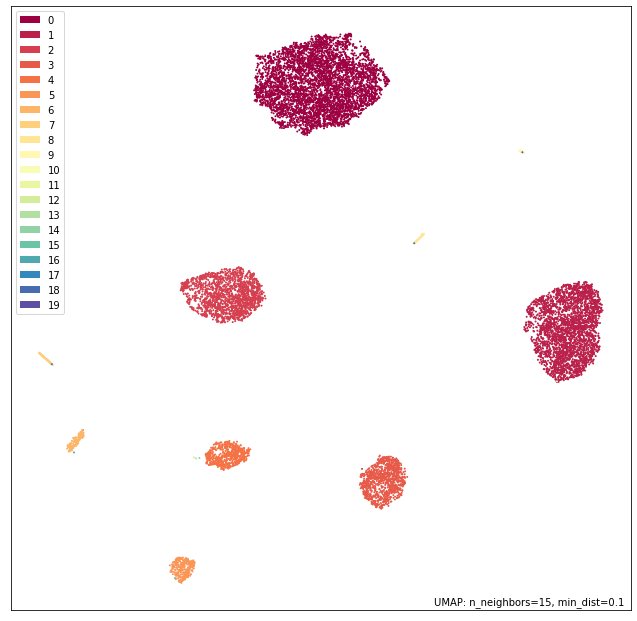

In [59]:
umap.plot.points(mapper, labels=total_labels).figure.savefig("test.pdf")

In [71]:
hover_data = pd.DataFrame({'index':np.arange(len(total_inputs)),
                           'label':total_labels})
hover_dict = {k:v for k, v in zip([i for i in range(20)], [i for i in range(10)]+[i for i in range(10)])}
hover_data['centroids'] = hover_data.label.map(hover_dict)

In [72]:
umap.plot.output_notebook()

Loading BokehJS ...

In [75]:
p = umap.plot.interactive(mapper, labels=total_labels, hover_data=hover_data, point_size=2)
umap.plot.show(p)

In [27]:
umap.plot.plt.savefig("test.png")

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

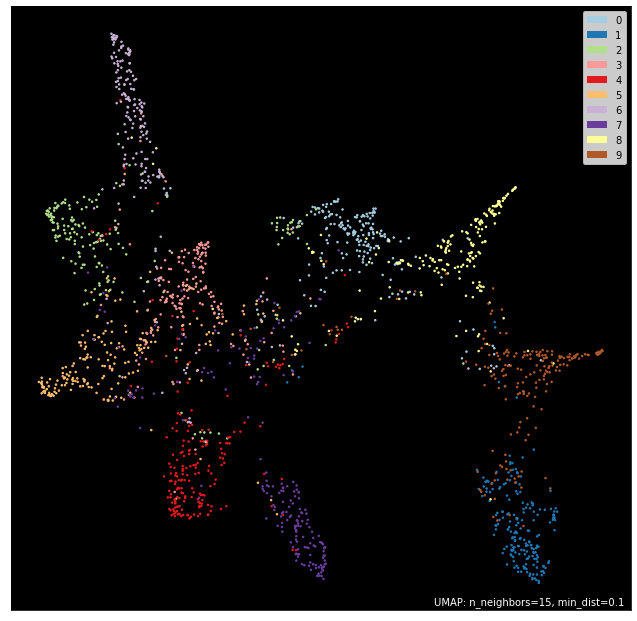

In [51]:
with open("/home/lizhaochen/fyp/fyp-long-tail-recognition/logs/CIFAR10_LT/e200_0.01/e200_0.01_test_features.pkl", 'rb') as f:
    features = pickle.load(f)
with open("/home/lizhaochen/fyp/fyp-long-tail-recognition/logs/CIFAR10_LT/e200_0.01/e200_0.01_test_labels.pkl", 'rb') as f:
    labels = pickle.load(f)
feat_list = []
label_list = []
for i in range(10):
    tmp_feat = features[labels==i][:200]
    tmp_label = labels[labels==i][:200]
    feat_list.append(tmp_feat)
    label_list.append(tmp_label)
features = np.concatenate(feat_list)
labels = np.concatenate(label_list)
mapper = umap.UMAP().fit(features)
umap.plot.points(mapper, labels=labels,color_key_cmap='Paired', background='black')

In [52]:
mapper

UMAP(dens_frac=0.0, dens_lambda=0.0)